# San Francisco BART Project

<div style="text-align:center">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToHUkWFWolhKGAJfLfOWyOBV_El9H8drn_EA&usqp=CAU" width=400>
</div>

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from termcolor import colored

import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.width",100)
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, root_mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Load and EDA

In [2]:
df1 = pd.read_csv("date-hour-soo-dest-2016.csv")
df2 = pd.read_csv("date-hour-soo-dest-2017.csv")


In [3]:
df1.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [4]:
df2.head()

,Origin,Destination,Throughput,DateTime
0,12TH,19TH,1,2017-01-01 00:00:00
1,12TH,24TH,2,2017-01-01 00:00:00
2,12TH,BAYF,1,2017-01-01 00:00:00
3,12TH,CIVC,5,2017-01-01 00:00:00
4,12TH,COLS,2,2017-01-01 00:00:00


In [5]:
df = pd.concat([df1,df2], ignore_index=True)
df.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [6]:
df.tail()

,Origin,Destination,Throughput,DateTime
13285202,WSPR,MONT,1,2017-05-03 23:00:00
13285203,WSPR,NBRK,1,2017-05-03 23:00:00
13285204,WSPR,NCON,1,2017-05-03 23:00:00
13285205,WSPR,SANL,2,2017-05-03 23:00:00
13285206,WSPR,SHAY,4,2017-05-03 23:00:00


In [7]:
df3 = pd.read_csv("station_info.csv")
df3.head()

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)


In [8]:
df = pd.merge(df,df3, left_on="Origin", right_on="Abbreviation")
df.head()

,Origin,Destination,Throughput,DateTime,Abbreviation,Description,Location,Name
0,12TH,12TH,1,2016-01-01 00:00:00,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,12TH,16TH,1,2016-01-01 00:00:00,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
2,12TH,24TH,4,2016-01-01 00:00:00,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
3,12TH,ASHB,4,2016-01-01 00:00:00,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
4,12TH,BALB,2,2016-01-01 00:00:00,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)


In [9]:
def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(70, '*'))
    print(f'Observations -------> {df.shape[0]}')
    print(f'Features     -------> {df.shape[1]}')
    print(f"Shape of dataset: {colored(df.shape, 'red')}")
    print(" TYPES OF FEATURES ".center(70, '*'))
    print(df.dtypes,"\n")
    print(" INFO ".center(70, "*"))
    print("\n",df.info(),"\n")
    print(' DUPLICATE VALUE ANALYSIS '.center(70, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print(" MISSING VALUES ".center(70, "*"))
    print(df.isnull().sum())
    print(" DESCRIPTIVE STATISTICS ".center(70, "*"))
    print(df.describe().T)
check_df(df)

******************************* SHAPE ********************************
Observations -------> 13269767
Features     -------> 8
Shape of dataset: (13269767, 8)
************************* TYPES OF FEATURES **************************
Origin          object
Destination     object
Throughput       int64
DateTime        object
Abbreviation    object
Description     object
Location        object
Name            object
dtype: object 

******************************** INFO ********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13269767 entries, 0 to 13269766
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Origin        object
 1   Destination   object
 2   Throughput    int64 
 3   DateTime      object
 4   Abbreviation  object
 5   Description   object
 6   Location      object
 7   Name          object
dtypes: int64(1), object(7)
memory usage: 809.9+ MB

 None 

********************** DUPLICATE VALUE ANALYSIS *****************

In [10]:
df.describe(include="object").T

,count,unique,top,freq
Origin,13269767,45,POWL,424161
Destination,13269767,46,POWL,415060
DateTime,13269767,10962,2016-09-29 17:00:00,1816
Abbreviation,13269767,45,POWL,424161
Description,13269767,45,"899 Market Street, San Francisco CA 94102<br /...",424161
Location,13269767,45,"-122.407974,37.784471,0",424161
Name,13269767,45,Powell St. (POWL),424161


## Feature Engineering

In [11]:
df["DateTime"] = pd.to_datetime(df["DateTime"])

In [12]:
df["Year"] = df["DateTime"].dt.year
df["Month"] = df["DateTime"].dt.month
df["Day"] = df["DateTime"].dt.day
df["MonthName"] = df["DateTime"].dt.month_name()
df["DayName"] = df["DateTime"].dt.day_name()
df["Hour"] =  df["DateTime"].dt.hour

In [13]:
df.drop(["DateTime", "Description", "Name"], axis=1, inplace=True)

In [14]:
df.sample()

,Origin,Destination,Throughput,Abbreviation,Location,Year,Month,Day,MonthName,DayName,Hour
10225836,POWL,CIVC,20,POWL,"-122.407974,37.784471,0",2016,11,3,November,Thursday,15


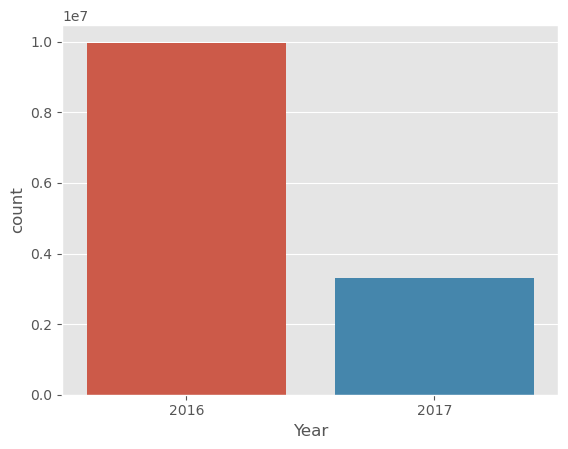

In [15]:
sns.countplot(x=df["Year"]);

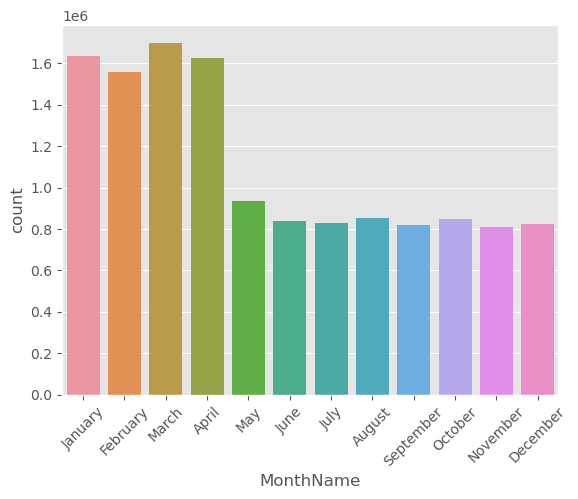

In [16]:
plt.figure()
plt.xticks(rotation=45)
sns.countplot(x=df["MonthName"]);

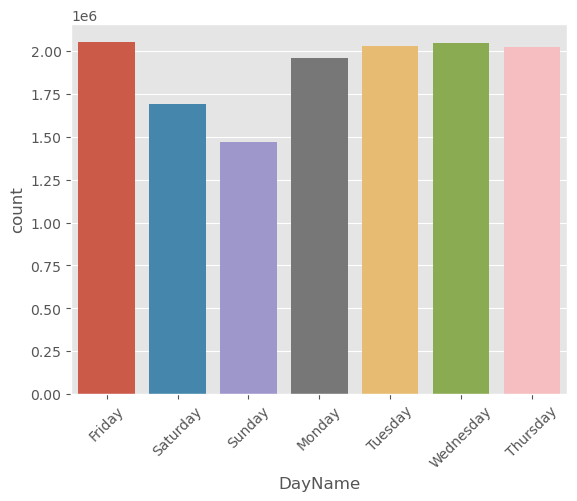

In [17]:
plt.figure()
plt.xticks(rotation=45)
sns.countplot(x=df["DayName"]);

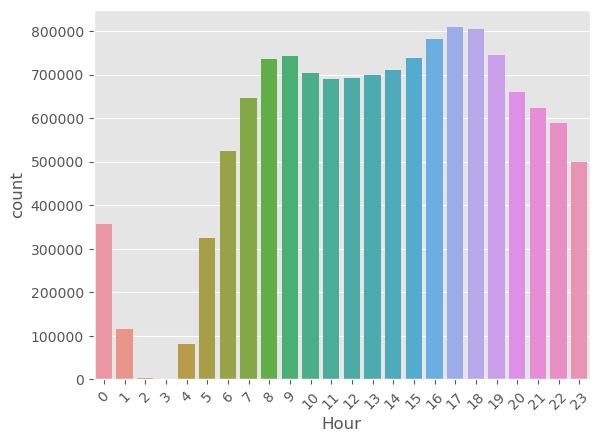

In [18]:
plt.figure()
plt.xticks(rotation=45)
sns.countplot(x=df["Hour"]);

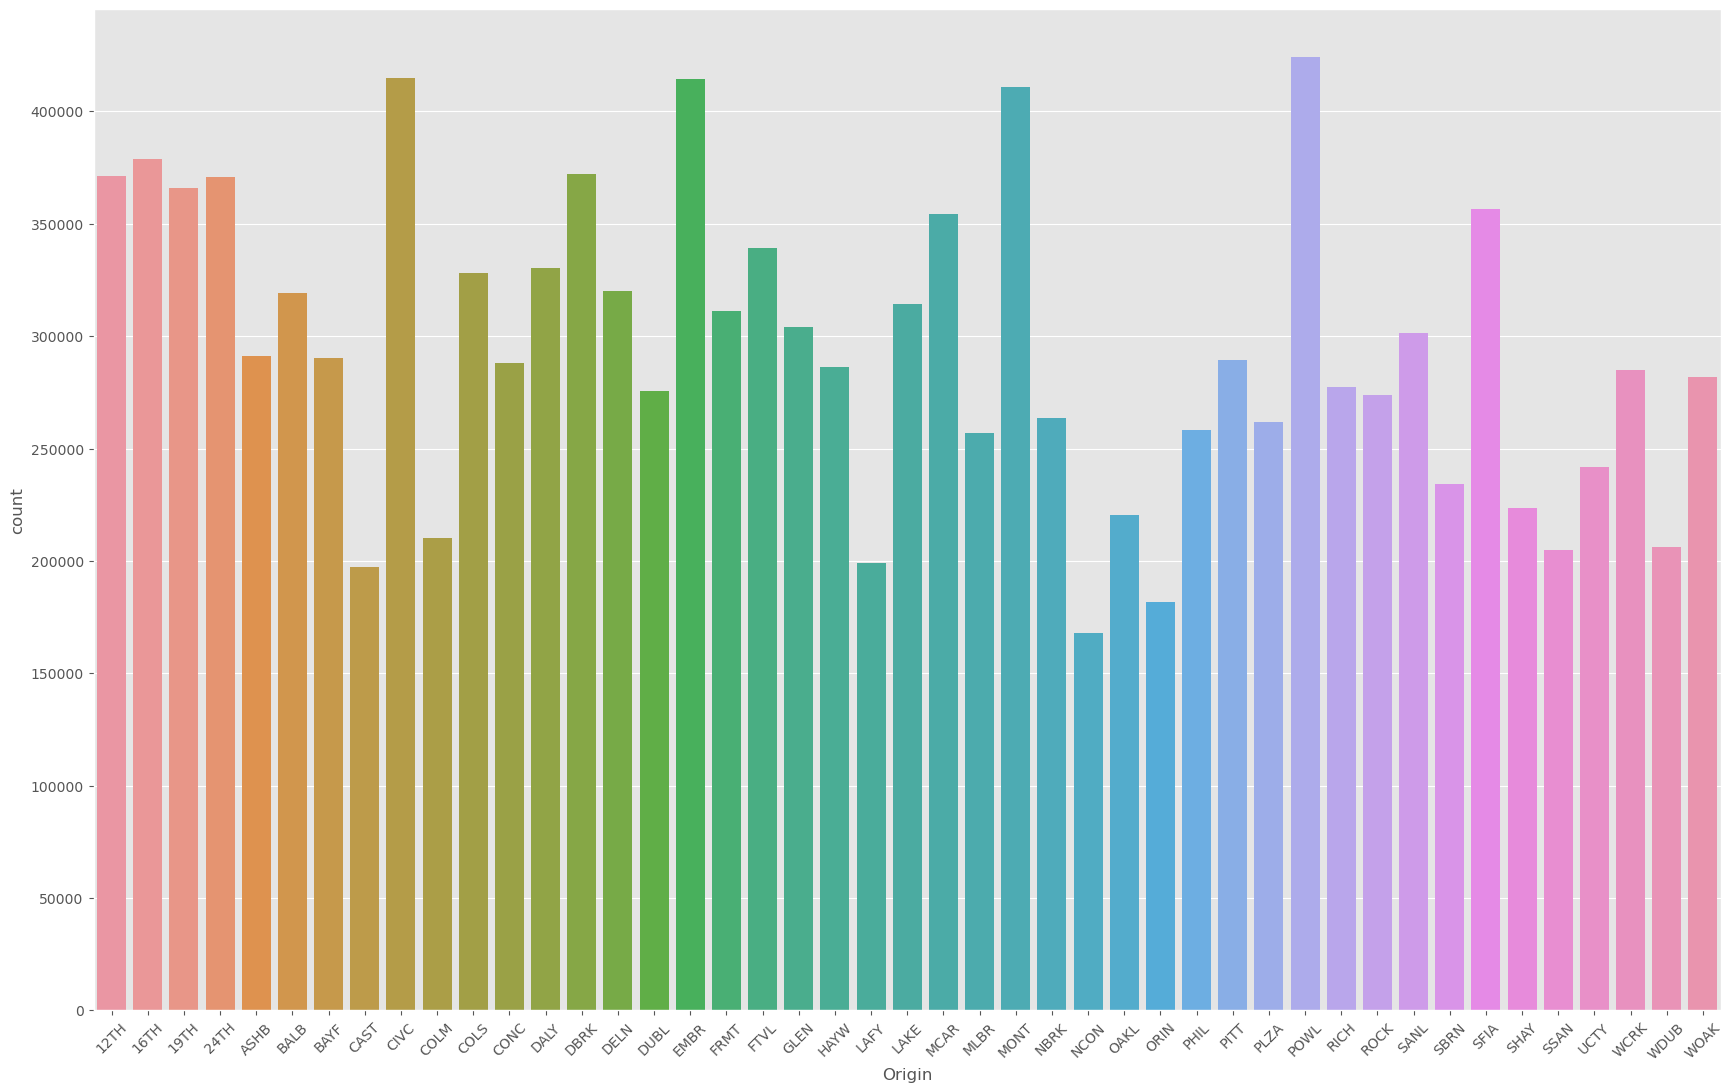

In [19]:
plt.figure(figsize=(21,13))
plt.xticks(rotation=45)
sns.countplot(x=df["Origin"]);

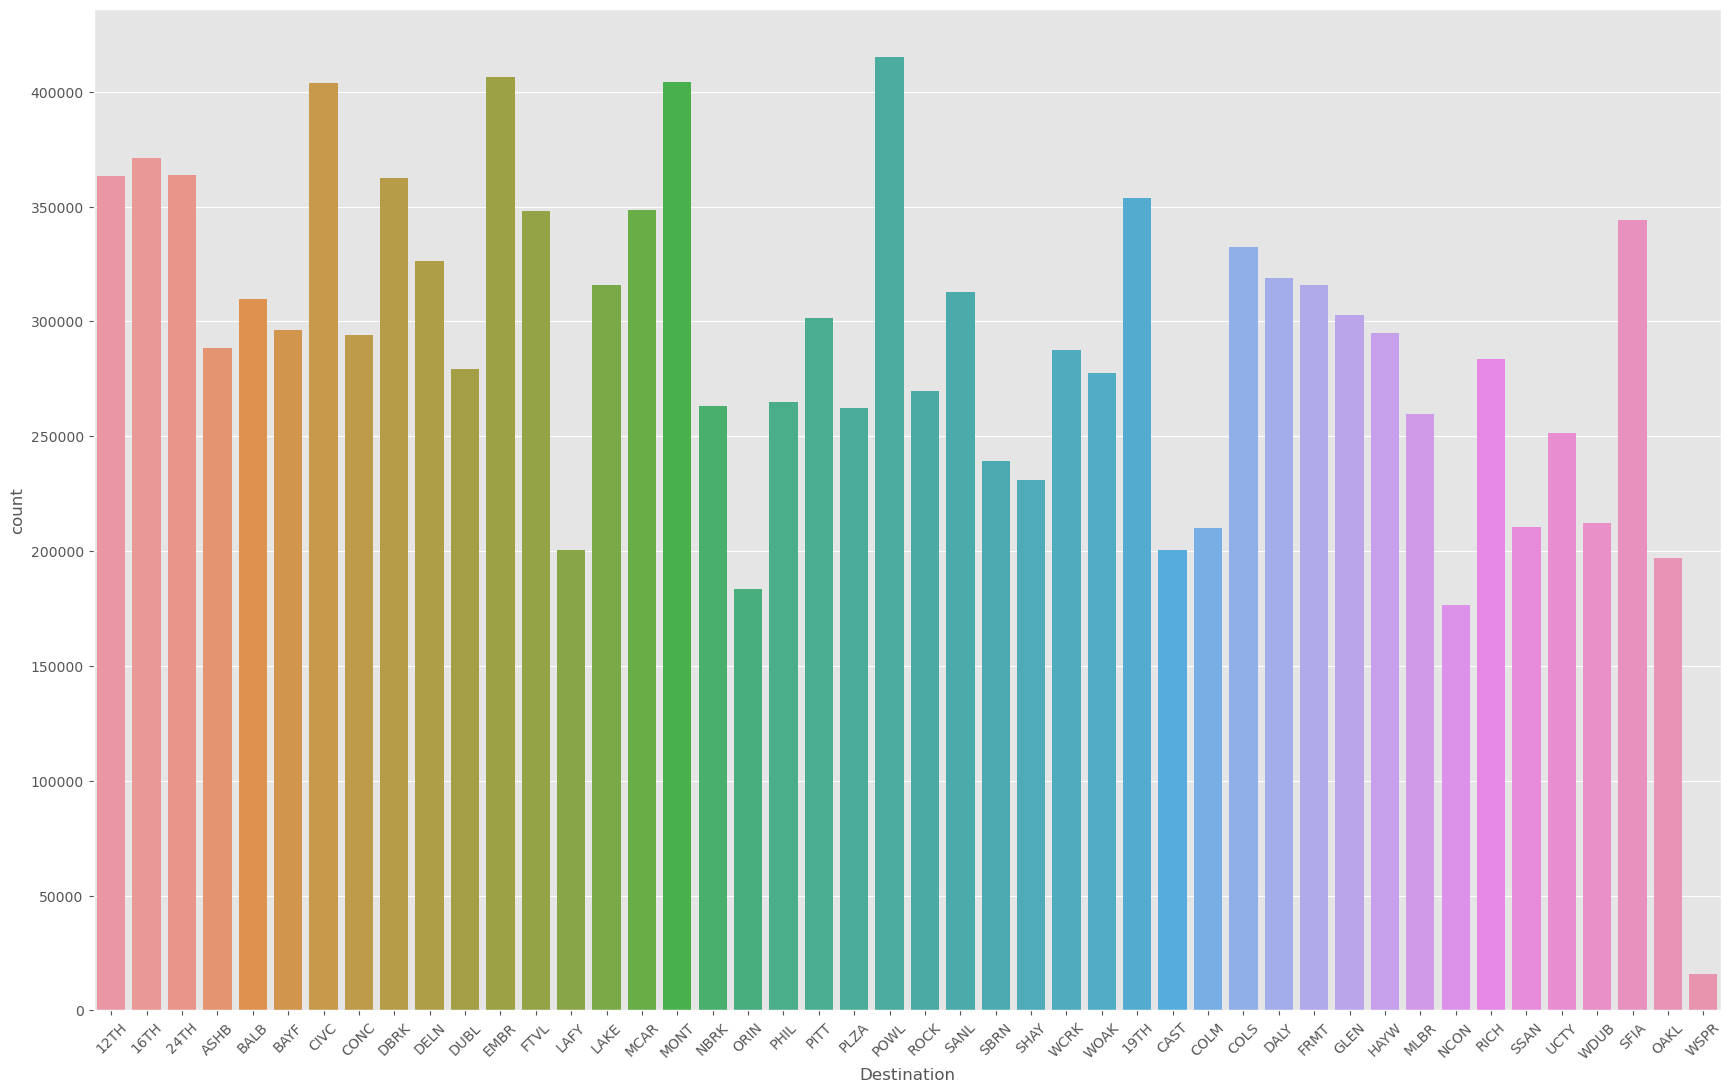

In [20]:
plt.figure(figsize=(21,13))
plt.xticks(rotation=45)
sns.countplot(x=df["Destination"]);

In [21]:
df["longitude"] = df["Location"].apply(lambda x: float(x.split(",")[0]))
df["latitude"] = df["Location"].apply(lambda x: float(x.split(",")[1]))


In [22]:
df.drop("Location", axis=1, inplace=True)

In [23]:
df["Route"] = df["Origin"]+"-"+df["Destination"]

In [24]:
df.sample()

,Origin,Destination,Throughput,Abbreviation,Year,Month,Day,MonthName,DayName,Hour,longitude,latitude,Route
9234786,PHIL,DBRK,5,PHIL,2016,6,10,June,Friday,6,-122.056,37.928,PHIL-DBRK


## Data Analytics Questions

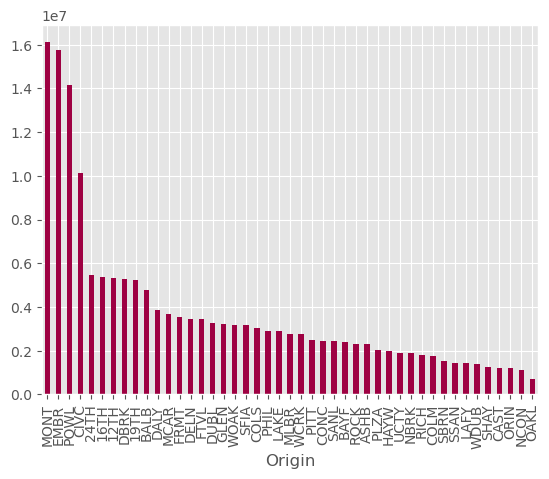

In [25]:
df.groupby("Origin")["Throughput"].sum().sort_values(ascending=False).plot.bar(colormap="Spectral");


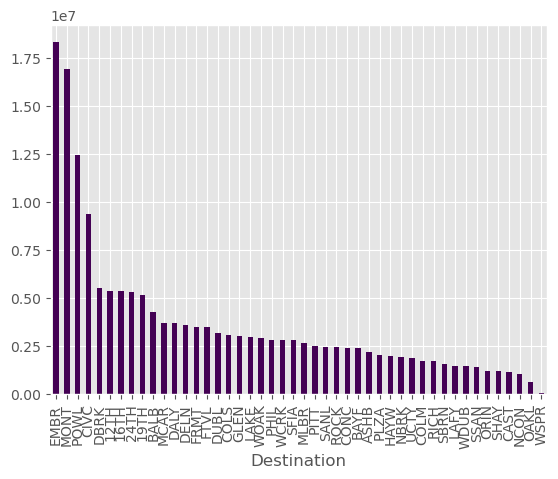

In [26]:
df.groupby("Destination")["Throughput"].sum().sort_values(ascending=False).plot(kind="bar",colormap="viridis");


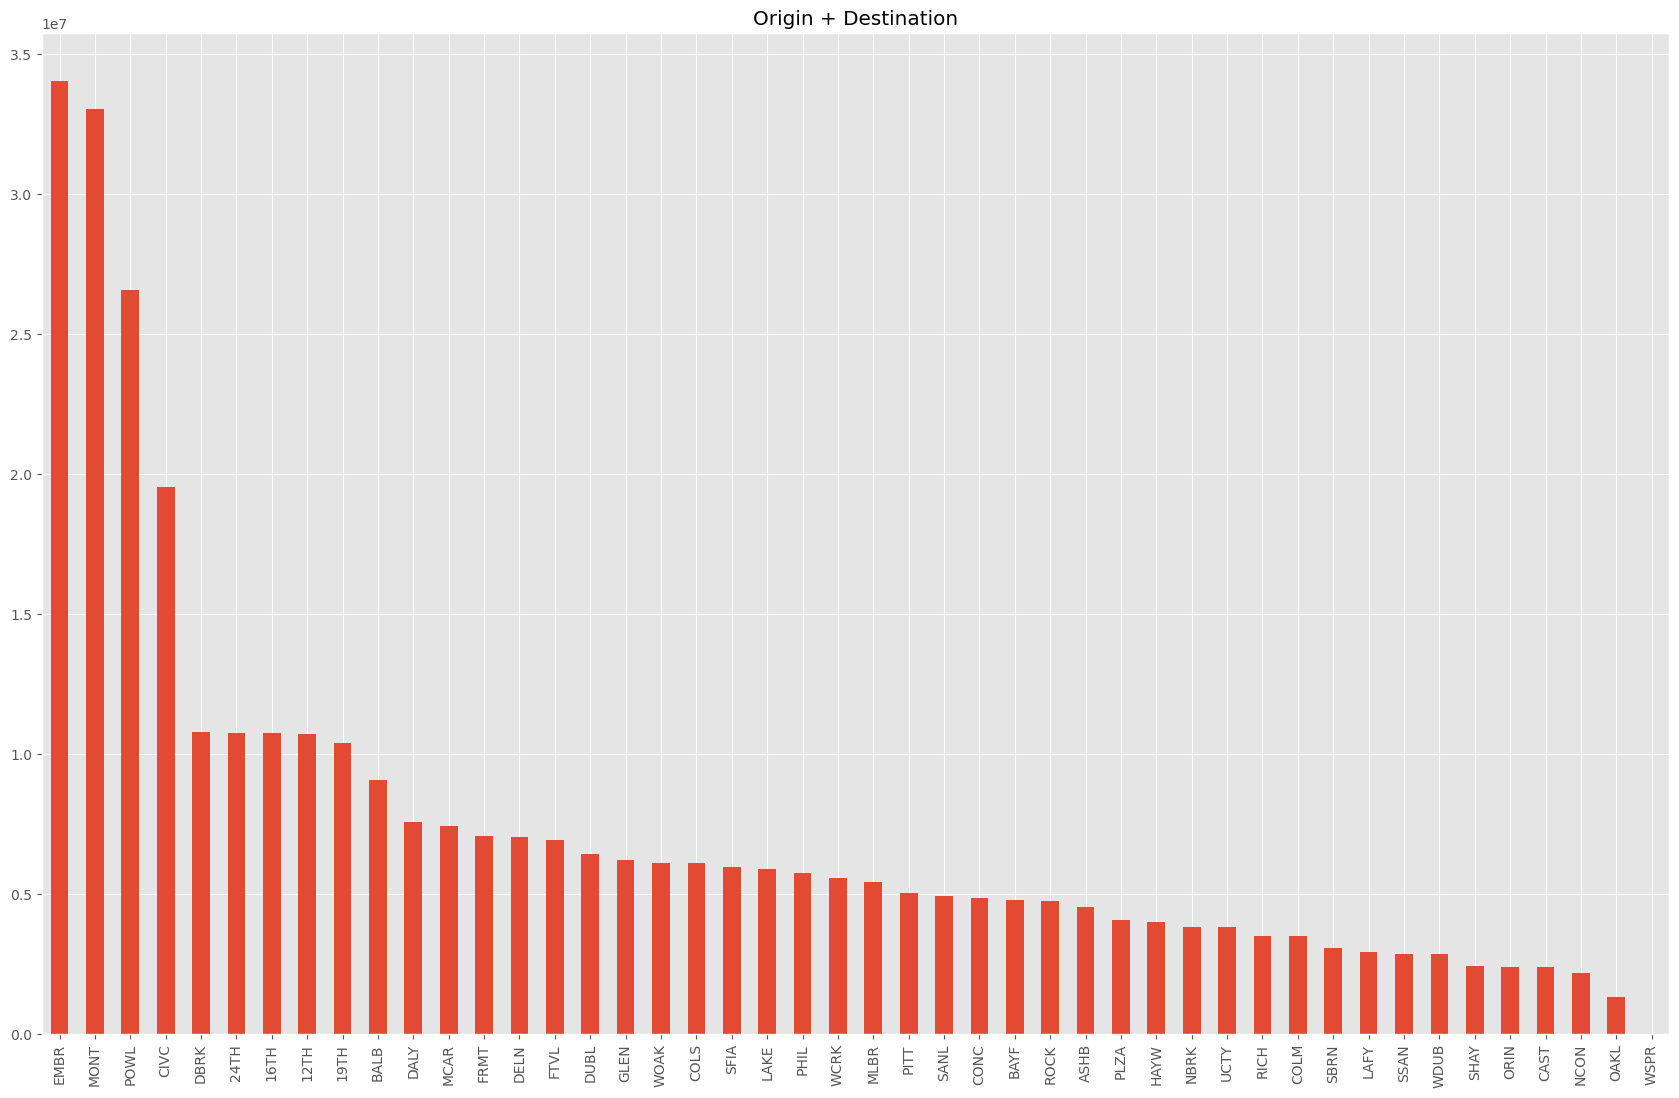

In [27]:
plt.figure(figsize=(21,13))
(df.groupby("Origin")["Throughput"].sum() + df.groupby("Destination")["Throughput"].sum()).sort_values(ascending=False).plot.bar()
plt.title("Origin + Destination");

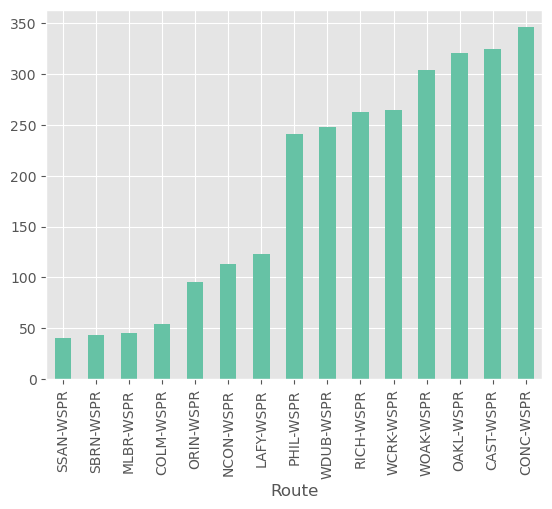

In [28]:
df.groupby("Route")["Throughput"].sum().sort_values()[:15].plot.bar(colormap="Set2");

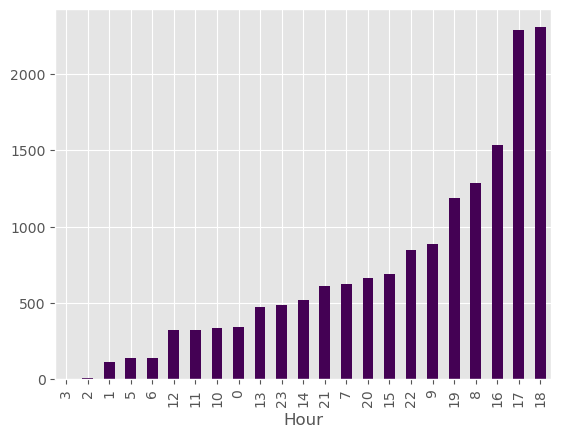

In [29]:
df[df.Route == "DBRK-SSAN"].groupby("Hour")["Throughput"].sum().sort_values().plot.bar(colormap="viridis");


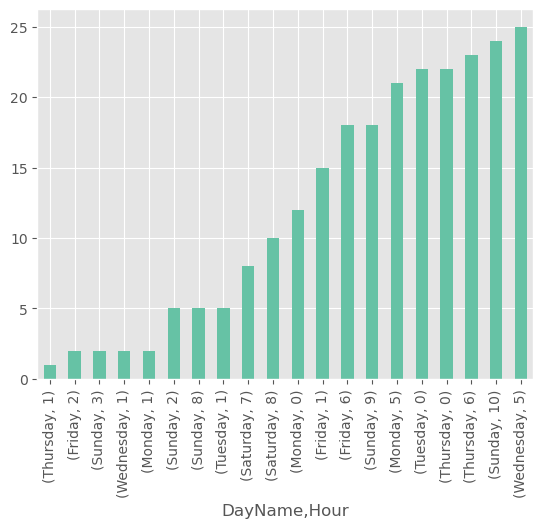

In [30]:
df[df.Route == "DBRK-SSAN"].groupby(["DayName","Hour"])["Throughput"].sum().sort_values()[:20].plot.bar(colormap='Set2');


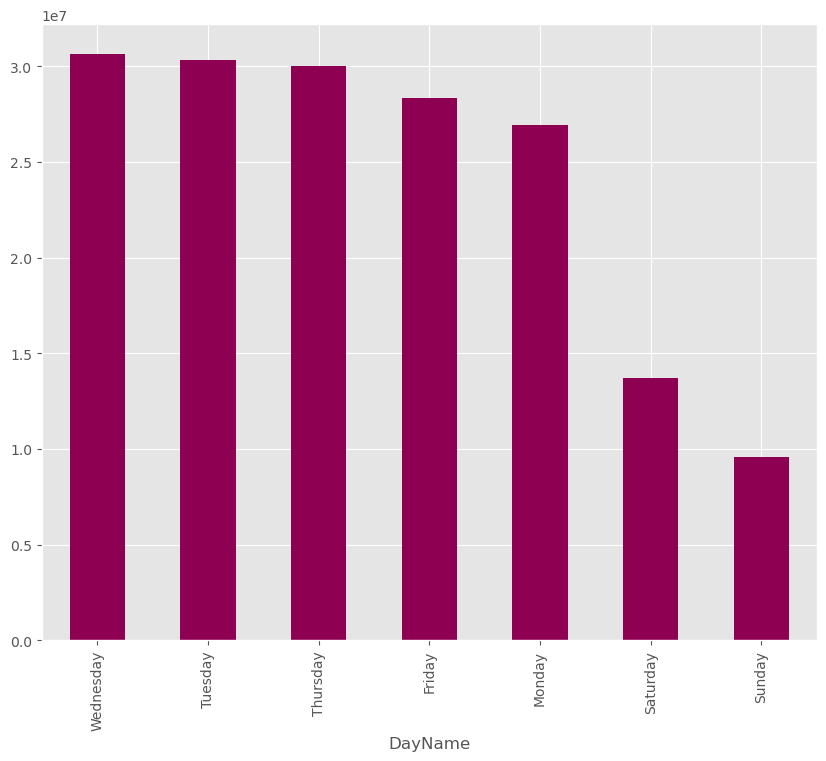

In [31]:
df.groupby("DayName")["Throughput"].sum().sort_values(ascending=False).plot.bar(figsize = (10,8), colormap='PiYG');

In [32]:
How many people take the BART late at night?

Object `night` not found.


In [33]:
df[(df.Hour > 0) & (df.Hour < 5)]["Throughput"].sum()

547946

In [39]:
df.to_pickle("df.pkl")

In [40]:
df = pd.read_pickle("df.pkl")

## Data Science Questions

In [41]:
df1 = df.sample(10000)

In [42]:
from sklearn.metrics.pairwise import haversine_distances
import pandas as pd
import numpy as np

# Convert latitude and longitude to radians for haversine distance calculation
df1['lat_radians'] = np.radians(df1['latitude'])
df1['long_radians'] = np.radians(df1['longitude'])

# Since there are 45 unique abbreviations, ensure we're working with unique station locations
# This step assumes each abbreviation has a unique latitude and longitude
# If not, you might need to aggregate or otherwise ensure uniqueness
unique_stations = df1.drop_duplicates(subset=['Abbreviation'])

# Extract the radian-converted coordinates into a numpy array for the unique stations
coordinates = unique_stations[['lat_radians', 'long_radians']].to_numpy()

# Calculate the pairwise haversine distances between all unique stations
dist_matrix_radians = haversine_distances(coordinates, coordinates)

# Convert distances from radians to kilometers
dist_matrix_km = dist_matrix_radians * 6371

# Create a DataFrame for the distance matrix, using unique abbreviations for index and columns
df_dist_matrix = pd.DataFrame(
    dist_matrix_km,
    index=unique_stations['Abbreviation'],
    columns=unique_stations['Abbreviation']
)





In [43]:
df_dist_matrix

Abbreviation,BALB,12TH,LAFY,16TH,WDUB,GLEN,EMBR,PHIL,MLBR,WCRK,SANL,SSAN,WOAK,MCAR,LAKE,ASHB,SFIA,24TH,CIVC,OAKL,FTVL,HAYW,RICH,FRMT,COLM,CONC,PITT,SBRN,COLS,SHAY,MONT,DALY,DELN,NCON,19TH,DUBL,ORIN,DBRK,ROCK,UCTY,NBRK,PLZA,BAYF,POWL,CAST
Abbreviation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BALB,0.000,17.973,34.185,5.418,45.743,1.755,9.085,41.371,14.513,39.147,25.213,6.384,16.284,19.860,18.091,21.355,12.706,4.297,7.101,20.719,20.509,32.238,25.332,45.302,4.426,46.215,55.113,9.717,22.327,35.693,8.575,2.561,25.374,48.564,18.450,48.285,28.996,22.828,22.012,40.568,22.247,23.994,28.370,7.809,32.897
12TH,17.973,0.000,16.280,13.720,32.315,16.294,11.099,23.450,24.796,21.179,13.316,21.699,2.085,2.839,0.930,5.454,23.437,14.098,12.819,11.335,5.254,22.027,16.443,37.727,21.652,28.452,37.306,22.428,8.603,26.645,11.500,20.488,14.065,30.994,0.568,34.642,11.316,7.382,4.881,32.578,7.876,11.254,17.422,12.187,21.318
LAFY,34.185,16.280,0.000,29.572,27.574,32.476,26.391,7.186,39.897,5.195,19.304,37.890,17.904,14.392,16.328,13.532,38.786,30.157,28.380,21.436,15.798,25.066,20.622,39.534,37.931,12.266,21.050,38.261,16.761,29.382,26.877,36.722,17.228,15.050,15.772,29.082,5.447,12.853,12.362,34.938,14.100,15.328,21.823,27.662,22.918
16TH,5.418,13.720,29.572,0.000,43.825,3.768,3.679,36.741,18.553,34.647,23.260,11.412,11.807,15.184,14.037,16.370,16.752,1.407,1.703,19.135,17.220,31.123,19.977,45.322,9.835,41.400,50.307,14.158,19.629,35.048,3.163,7.862,19.956,43.624,14.123,46.314,24.250,17.711,17.237,40.370,17.026,18.615,26.873,2.391,31.370
WDUB,45.743,32.315,27.574,43.825,0.000,44.625,42.498,27.798,41.851,25.947,20.610,45.555,34.309,33.071,31.537,34.528,41.910,43.483,43.641,25.025,27.330,14.366,45.692,16.385,47.367,31.727,35.520,43.506,24.374,13.479,42.753,47.587,42.342,34.786,32.268,2.566,29.978,35.369,32.656,14.452,36.736,39.617,17.447,43.222,13.004
GLEN,1.755,16.294,32.476,3.768,44.625,0.000,7.395,39.662,15.337,37.456,24.039,7.704,14.572,18.132,16.442,19.604,13.521,2.560,5.470,19.617,19.007,31.313,23.743,44.740,6.093,44.484,53.384,10.709,20.960,34.912,6.895,4.312,23.697,46.821,16.762,47.156,27.268,21.074,20.276,39.931,20.495,22.270,27.328,6.151,31.860
EMBR,9.085,11.099,26.391,3.679,42.498,7.395,0.000,33.519,21.436,31.526,22.210,14.887,9.050,12.107,11.594,12.991,19.675,4.861,2.096,18.506,15.322,30.508,16.467,45.323,13.487,38.041,46.941,17.331,18.124,34.702,0.525,11.541,16.301,40.180,11.413,44.931,21.000,14.208,14.032,40.268,13.446,14.939,26.068,1.341,30.459
PHIL,41.371,23.450,7.186,36.741,27.798,39.662,33.519,0.000,46.656,2.744,24.741,45.001,25.090,21.569,23.469,20.582,45.626,37.339,35.526,27.585,22.579,28.900,26.072,41.840,45.099,5.560,13.985,45.248,23.039,32.702,34.011,43.907,22.876,8.752,22.948,28.735,12.519,19.711,19.511,37.719,20.855,21.500,26.481,34.802,26.489
MLBR,14.513,24.796,39.897,18.553,41.851,15.337,21.436,46.656,0.000,44.040,24.048,8.719,24.135,27.532,24.351,29.895,1.816,17.148,20.100,19.844,24.110,27.496,37.543,36.451,11.707,52.078,60.594,4.916,23.875,29.270,21.069,13.825,36.637,54.947,25.363,44.377,35.701,31.764,29.672,32.556,31.759,34.496,25.303,20.567,29.180


In [50]:
dff = df[(df["DayName"]!="Sunday") & (df["DayName"]!="Saturday")]
# filtering all days exclude saturday and sunday for commuting to work

In [53]:
dff = dff[(dff.Hour>=16) & (dff.Hour<=19)]
#  filtering hours for commuting to work

In [55]:
dff.shape

(2366482, 13)

In [62]:
dff.groupby(["Route", "Hour"])["Throughput"].sum()

Route      Hour
12TH-12TH  16      1258
           17      1738
           18      1178
           19       679
12TH-16TH  16      6942
                   ... 
WOAK-WOAK  19       434
WOAK-WSPR  16        13
           17        12
           18         8
           19         8
Name: Throughput, Length: 8278, dtype: int64

In [63]:
dff["work_hour"] = dff.groupby(["Route", "Hour"])["Throughput"].transform("sum")

In [58]:
dff.groupby("Route")["Throughput"].sum()

Route
12TH-12TH     4853
12TH-16TH    46251
12TH-19TH     5880
12TH-24TH    54349
12TH-ASHB    49678
             ...  
WOAK-UCTY     1441
WOAK-WCRK     1620
WOAK-WDUB     1191
WOAK-WOAK     2657
WOAK-WSPR       41
Name: Throughput, Length: 2070, dtype: int64

In [64]:
dff["work_route"] = dff.groupby("Route")["Throughput"].transform("sum")

In [65]:
dff.sample()

,Origin,Destination,Throughput,Abbreviation,Year,Month,Day,MonthName,DayName,Hour,longitude,latitude,Route,work_hour,work_route
9529941,PITT,RICH,3,PITT,2016,7,28,July,Thursday,18,-121.945,38.019,PITT-RICH,637,2162


In [66]:
dff.to_pickle("dff1.pkl")

In [99]:
dff = pd.read_pickle("dff1.pkl")

## Data Preprocessing

In [100]:
dff1 = dff[["Throughput","Year","Month","Day","Hour","longitude","latitude","work_hour","work_route"]]


In [101]:
dff1.reset_index(drop="index",inplace=True)

In [102]:
X = dff1.drop("work_route", axis=1)
y = dff1[["work_route"]]

In [103]:
X = StandardScaler().fit_transform(X)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [105]:
model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))

model.compile(loss="mse", optimizer="adam")

In [106]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
51767/51767 [==============================] - 69s 1ms/step - loss: 338107008.0000 - val_loss: 163739648.0000
Epoch 2/10
51767/51767 [==============================] - 66s 1ms/step - loss: 125745344.0000 - val_loss: 110198776.0000
Epoch 3/10
51767/51767 [==============================] - 64s 1ms/step - loss: 107409168.0000 - val_loss: 102947360.0000
Epoch 4/10
51767/51767 [==============================] - 72s 1ms/step - loss: 102856368.0000 - val_loss: 99826576.0000
Epoch 5/10
51767/51767 [==============================] - 71s 1ms/step - loss: 99028504.0000 - val_loss: 96111736.0000
Epoch 6/10
51767/51767 [==============================] - 62s 1ms/step - loss: 94968064.0000 - val_loss: 93952520.0000
Epoch 7/10
51767/51767 [==============================] - 61s 1ms/step - loss: 91439528.0000 - val_loss: 89347304.0000
Epoch 8/10
51767/51767 [==============================] - 68s 1ms/step - loss: 88134448.0000 - val_loss: 87130464.0000
Epoch 9/10
51767/51767 [=================

In [107]:
prediction = model.predict(X_test)

22186/22186 [==============================] - 16s 737us/step


In [108]:
print(f"R2: {r2_score(prediction,y_test)}\n RMSE: {root_mean_squared_error(prediction,y_test)}")

R2: 0.9776734393346199
 RMSE: 9072.38611938267


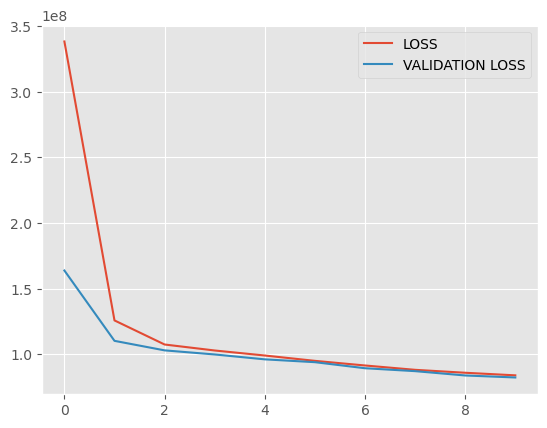

In [109]:
plt.plot(history.history["loss"], label="LOSS")
plt.plot(history.history["val_loss"], label="VALIDATION LOSS")
plt.legend();

In [111]:
model.save("model_bart.h5")

In [110]:
prediction

array([[ 3092.8447],
       [ 7833.1616],
       [13331.494 ],
       ...,
       [65819.16  ],
       [33157.957 ],
       [21669.197 ]], dtype=float32)

In [112]:

pred_final = model.predict(X)

73953/73953 [==============================] - 55s 748us/step


In [113]:
pred_final

array([[31182.932 ],
       [ 6426.734 ],
       [38225.543 ],
       ...,
       [ 2355.9246],
       [ 2065.3933],
       [ 1800.5828]], dtype=float32)

In [118]:
predictions = pd.DataFrame()
predictions["Route"] = dff["Route"]
predictions["work_route_predicted"] = pred_final.astype(int)

In [121]:
predictions

,Route,work_route_predicted
410,12TH-16TH,31182
411,12TH-19TH,6426
412,12TH-24TH,38225
413,12TH-ASHB,48295
414,12TH-BALB,23761
...,...,...
13269667,WOAK-SHAY,2736
13269668,WOAK-SSAN,2276
13269669,WOAK-UCTY,2355
13269670,WOAK-WCRK,2065
